# Laplacian Convolutional Representation (LCR)

In [1]:
import numpy as np

def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

def laplacian(n, tau):
    ell = np.zeros(n)
    ell[0] = 2 * tau
    for k in range(tau):
        ell[k + 1] = -1
        ell[-k - 1] = -1
    return ell

def prox(z, w, lmbda, denominator):
    T = z.shape[0]
    temp = np.fft.fft(lmbda * z - w) / denominator
    temp1 = 1 - T / (lmbda * np.abs(temp))
    temp1[temp1 <= 0] = 0
    return np.fft.ifft(temp * temp1).real

def update_z(y_train, pos_train, x, w, lmbda, eta):
    z = x + w / lmbda
    z[pos_train] = (lmbda / (lmbda + eta) * z[pos_train] 
                    + eta / (lmbda + eta) * y_train)
    return z

def update_w(x, z, w, lmbda):
    return w + lmbda * (x - z)

def LCR(y_true, y, lmbda, gamma, tau, maxiter = 50):
    eta = 100 * lmbda
    T = y.shape
    pos_train = np.where(y != 0)
    y_train = y[pos_train]
    pos_test = np.where((y_true != 0) & (y == 0))
    y_test = y_true[pos_test]
    z = y.copy()
    w = y.copy()
    denominator = lmbda + gamma * np.fft.fft(laplacian(T, tau)) ** 2
    del y_true, y
    show_iter = 10
    for it in range(maxiter):
        x = prox(z, w, lmbda, denominator)
        z = update_z(y_train, pos_train, x, w, lmbda, eta)
        w = update_w(x, z, w, lmbda)
        if (it + 1) % show_iter == 0:
            print(it + 1)
            print(compute_mape(y_test, x[pos_test]))
            print(compute_rmse(y_test, x[pos_test]))
            print()
    return x

In [2]:
import numpy as np
np.random.seed(1000)

dense_mat = np.load('../datasets/California-data-set/pems-w1.npz')['arr_0']
for t in range(2, 5):
    dense_mat = np.append(dense_mat, np.load('../datasets/California-data-set/pems-w{}.npz'.format(t))['arr_0'], 
                          axis = 1)
dim1, dim2 = dense_mat.shape

missing_rate = 0.3
sparse_mat = dense_mat * np.round(np.random.rand(dim1, dim2) + 0.5 - missing_rate)

dense_y = dense_mat.reshape(-1, order = 'C')
sparse_y = sparse_mat.reshape(-1, order = 'C')
del dense_mat, sparse_mat

import time
start = time.time()
T = sparse_y.shape[0]
lmbda = 5e-6 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_y, sparse_y, lmbda, gamma, tau, maxiter)
end = time.time()
print('Running time: %d seconds.'%(end - start))

10
0.023387084267159172
2.115986144908133

20
0.02072479217932032
1.9452616704559709

30
0.0198821149462046
1.8822753889380788

40
0.019396443743566038
1.845288161548513

50
0.019067681862730442
1.8204879221545047

60
0.018828545815195743
1.8026897503613424

70
0.018647727034794042
1.7894477757993696

80
0.01850730679278231
1.7793438876123289

90
0.01839629001183427
1.771488501027759

100
0.01830772229906533
1.7652819327164575

Running time: 2155 seconds.


In [3]:
import numpy as np
np.random.seed(1000)

dense_mat = np.load('../datasets/California-data-set/pems-w1.npz')['arr_0']
for t in range(2, 5):
    dense_mat = np.append(dense_mat, np.load('../datasets/California-data-set/pems-w{}.npz'.format(t))['arr_0'], 
                          axis = 1)
dim1, dim2 = dense_mat.shape

missing_rate = 0.5
sparse_mat = dense_mat * np.round(np.random.rand(dim1, dim2) + 0.5 - missing_rate)

dense_y = dense_mat.reshape(-1, order = 'C')
sparse_y = sparse_mat.reshape(-1, order = 'C')
del dense_mat, sparse_mat

import time
start = time.time()
T = sparse_y.shape[0]
lmbda = 5e-6 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_y, sparse_y, lmbda, gamma, tau, maxiter)
end = time.time()
print('Running time: %d seconds.'%(end - start))

10
0.031986397502960943
2.6018268096587223

20
0.022496621071551655
2.08529073403924

30
0.021399188337972268
2.0151281093271876

40
0.020849708588443063
1.9773735083553703

50
0.02049898802038049
1.952734889654385

60
0.0202514153393395
1.935324910943746

70
0.02006667257816113
1.922434123863414

80
0.019924426826766418
1.9126058729659006

90
0.019812330955969883
1.9049332241678487

100
0.019722960821261553
1.8988874640941855

Running time: 2120 seconds.


In [4]:
import numpy as np
np.random.seed(1000)

dense_mat = np.load('../datasets/California-data-set/pems-w1.npz')['arr_0']
for t in range(2, 5):
    dense_mat = np.append(dense_mat, np.load('../datasets/California-data-set/pems-w{}.npz'.format(t))['arr_0'], 
                          axis = 1)
dim1, dim2 = dense_mat.shape

missing_rate = 0.7
sparse_mat = dense_mat * np.round(np.random.rand(dim1, dim2) + 0.5 - missing_rate)

dense_y = dense_mat.reshape(-1, order = 'C')
sparse_y = sparse_mat.reshape(-1, order = 'C')
del dense_mat, sparse_mat

import time
start = time.time()
T = sparse_y.shape[0]
lmbda = 5e-6 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_y, sparse_y, lmbda, gamma, tau, maxiter)
end = time.time()
print('Running time: %d seconds.'%(end - start))

10
0.08478690448955568
5.8982707358657445

20
0.029900095916205374
2.536304421665225

30
0.024997520666981486
2.290259986118422

40
0.023980314395881275
2.240722366410028

50
0.023545073793983115
2.217495960019057

60
0.02327392392507276
2.202530010951288

70
0.0230854659243972
2.1919069443289865

80
0.02294582481732324
2.1839503267623948

90
0.022838996818665466
2.1778295822497125

100
0.022755412669277452
2.1730188566539157

Running time: 2112 seconds.


In [5]:
import numpy as np
np.random.seed(1000)

dense_mat = np.load('../datasets/California-data-set/pems-w1.npz')['arr_0']
for t in range(2, 5):
    dense_mat = np.append(dense_mat, np.load('../datasets/California-data-set/pems-w{}.npz'.format(t))['arr_0'], 
                          axis = 1)
dim1, dim2 = dense_mat.shape

missing_rate = 0.9
sparse_mat = dense_mat * np.round(np.random.rand(dim1, dim2) + 0.5 - missing_rate)

dense_y = dense_mat.reshape(-1, order = 'C')
sparse_y = sparse_mat.reshape(-1, order = 'C')
del dense_mat, sparse_mat

import time
start = time.time()
T = sparse_y.shape[0]
lmbda = 5e-6 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_y, sparse_y, lmbda, gamma, tau, maxiter)
end = time.time()
print('Running time: %d seconds.'%(end - start))

10
0.3393503018177787
21.6489490707677

20
0.11127591190266155
7.556398282896319

30
0.06378877251231992
4.5200214695908105

40
0.04379152084227496
3.4679803548906296

50
0.03825343117736033
3.192296228216297

60
0.036105293694557304
3.105655907483398

70
0.035310393780620786
3.0749790624183

80
0.03496730488114901
3.0631732661549234

90
0.03479350334250502
3.05731850156267

100
0.03469148304453544
3.0539816518977845

Running time: 2078 seconds.


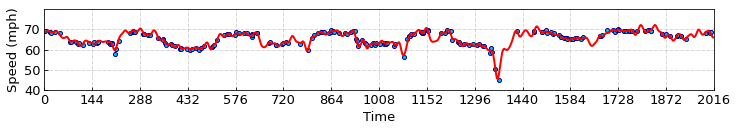

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize = (12, 1.5))
ax = fig.add_subplot(111)
d = 7
# plt.plot(dense_y[: 288 * d], 'dodgerblue', linewidth = 1)
plt.plot(np.arange(0, 288 * d), sparse_y[: 288 * d], 'o', 
         markeredgecolor = 'darkblue', 
         markerfacecolor = 'deepskyblue', markersize = 4)
plt.plot(x[: 288 * d], 'red', linewidth = 2)
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xlim([0, 288 * 7])
plt.ylim([40, 80])
plt.xticks(np.arange(0, 288 * 7 + 1, 144))
plt.yticks(np.arange(40, 80, 10))
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

# plt.savefig('speeds_tau_2_gamma_2.pdf', bbox_inches = "tight")
plt.show()

### License

<div class="alert alert-block alert-danger">
<b>This work is released under the MIT license.</b>
</div>